# Comparación de árboles de clasificación

C:\Users\rodri\AppData\Local\Temp\ipykernel_17356\4063182143.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('tab10', len(clases))


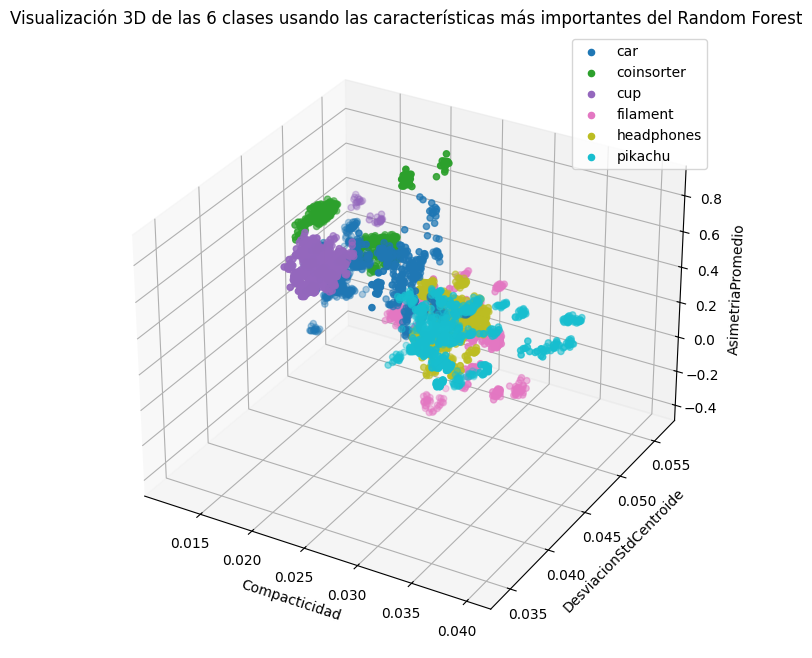


Decision Tree - Training Time: 0.03 seconds
Decision Tree - Accuracy: 0.92
Decision Tree - Classification Report
              precision    recall  f1-score   support

         car       0.96      0.84      0.90       251
  coinsorter       0.97      0.99      0.98       232
         cup       0.99      1.00      0.99       252
    filament       0.87      0.88      0.87       233
  headphones       0.77      0.99      0.87       228
     pikachu       0.98      0.82      0.89       244

    accuracy                           0.92      1440
   macro avg       0.92      0.92      0.92      1440
weighted avg       0.93      0.92      0.92      1440



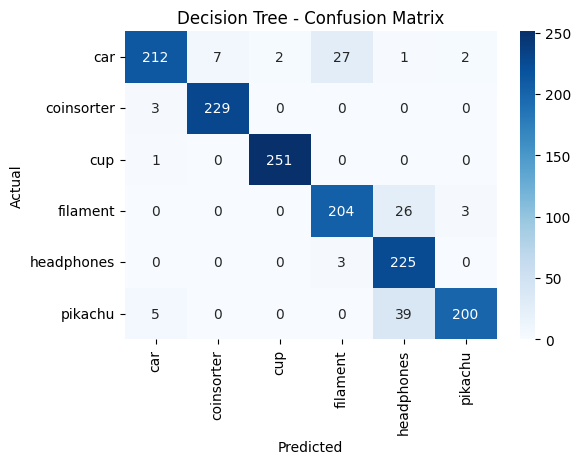


Random Forest - Training Time: 0.68 seconds
Random Forest - Accuracy: 1.00
Random Forest - Classification Report
              precision    recall  f1-score   support

         car       1.00      1.00      1.00       251
  coinsorter       1.00      1.00      1.00       232
         cup       1.00      1.00      1.00       252
    filament       1.00      1.00      1.00       233
  headphones       1.00      1.00      1.00       228
     pikachu       1.00      1.00      1.00       244

    accuracy                           1.00      1440
   macro avg       1.00      1.00      1.00      1440
weighted avg       1.00      1.00      1.00      1440



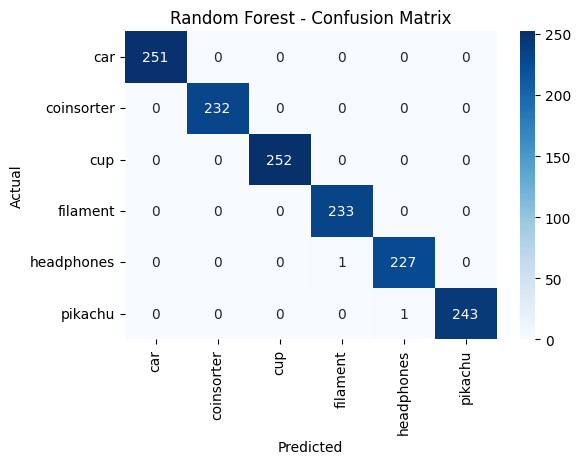


AdaBoost - Training Time: 0.31 seconds
AdaBoost - Accuracy: 0.62
AdaBoost - Classification Report
              precision    recall  f1-score   support

         car       0.38      0.91      0.54       251
  coinsorter       1.00      0.00      0.00       232
         cup       0.94      0.92      0.93       252
    filament       0.61      0.41      0.49       233
  headphones       0.91      0.53      0.67       228
     pikachu       0.72      0.90      0.80       244

    accuracy                           0.62      1440
   macro avg       0.76      0.61      0.57      1440
weighted avg       0.76      0.62      0.58      1440



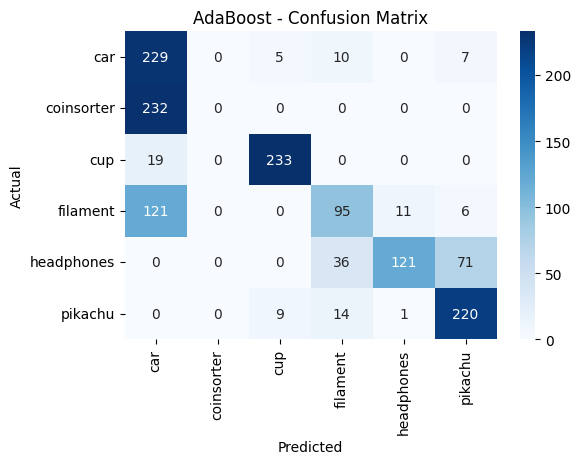


Gradient Boosting - Training Time: 5.33 seconds
Gradient Boosting - Accuracy: 0.99
Gradient Boosting - Classification Report
              precision    recall  f1-score   support

         car       1.00      0.99      0.99       251
  coinsorter       1.00      1.00      1.00       232
         cup       1.00      1.00      1.00       252
    filament       0.99      0.99      0.99       233
  headphones       0.97      1.00      0.99       228
     pikachu       1.00      0.98      0.99       244

    accuracy                           0.99      1440
   macro avg       0.99      0.99      0.99      1440
weighted avg       0.99      0.99      0.99      1440



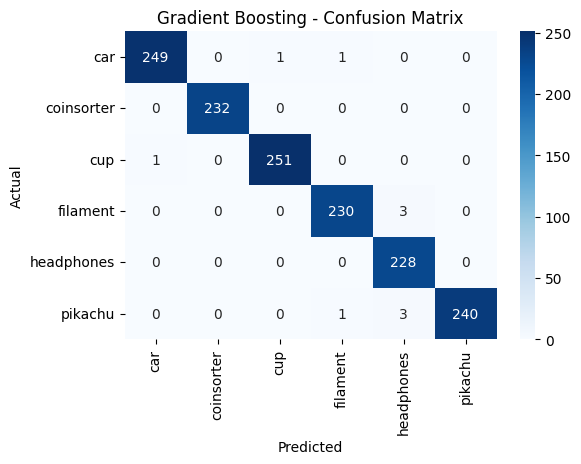


Extra Trees - Training Time: 0.13 seconds
Extra Trees - Accuracy: 1.00
Extra Trees - Classification Report
              precision    recall  f1-score   support

         car       1.00      1.00      1.00       251
  coinsorter       1.00      1.00      1.00       232
         cup       1.00      1.00      1.00       252
    filament       1.00      1.00      1.00       233
  headphones       1.00      1.00      1.00       228
     pikachu       1.00      1.00      1.00       244

    accuracy                           1.00      1440
   macro avg       1.00      1.00      1.00      1440
weighted avg       1.00      1.00      1.00      1440



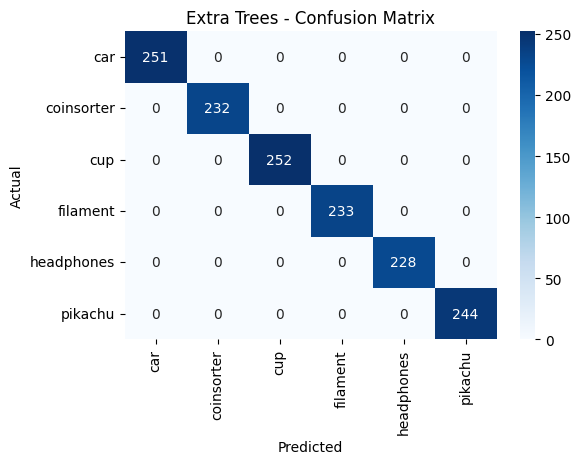

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import time

# Lectura y separación del dataset
data = pd.read_csv('Dataset.csv')
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

# Obtener la importancia de las características del RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, min_samples_split=5, criterion='entropy')
rf_clf.fit(X, y)
importancias = rf_clf.feature_importances_
indices = np.argsort(importancias)[::-1]

# Seleccionar las 3 características más importantes
top_features = X.columns[indices[:3]]
X_top = X[top_features]

# Graficar en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
clases = np.unique(y)
colores = plt.cm.get_cmap('tab10', len(clases))

for i, clase in enumerate(clases):
    indices_clase = (y == clase)
    ax.scatter(X_top[indices_clase].iloc[:, 0], 
               X_top[indices_clase].iloc[:, 1], 
               X_top[indices_clase].iloc[:, 2], 
               label=clase, 
               color=colores(i))

ax.set_xlabel(top_features[0])
ax.set_ylabel(top_features[1])
ax.set_zlabel(top_features[2])
ax.set_title('Visualización 3D de las 6 clases usando las características más importantes del Random Forest')
ax.legend()
plt.show()

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar los clasificadores con parámetros específicos
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=4, criterion='gini'),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, min_samples_split=5, criterion='entropy'),
    "AdaBoost": AdaBoostClassifier(random_state=42, n_estimators=50, learning_rate=1.0, algorithm='SAMME'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=4),
    "Extra Trees": ExtraTreesClassifier(random_state=42, n_estimators=100, max_depth=None, min_samples_split=2, criterion='gini')
}

# Entrenar los clasificadores y medir el tiempo de entrenamiento
train_times = {}
for name, clf in classifiers.items():
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    train_times[name] = end_time - start_time

# Realizar predicciones en el conjunto de prueba y calcular la precisión
results = {}
for name, clf in classifiers.items():
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'accuracy': accuracy,
        'classification_report': classification_report(y_test, y_pred, zero_division=1),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

# Mostrar los resultados de precisión y tiempos de entrenamiento
for name in classifiers.keys():
    print(f"\n{name} - Training Time: {train_times[name]:.2f} seconds")
    print(f"{name} - Accuracy: {results[name]['accuracy']:.2f}")
    print(f"{name} - Classification Report")
    print(results[name]['classification_report'])

    # Crear y mostrar la matriz de confusión
    cm = results[name]['confusion_matrix']
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()